In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# populate probability arrays
num_pulls_char = [1713, 1896, 1752, 1735, 1634, 1728, 1608, 1626, 1640, 1570, 1583, 1544, 1490, 1494, 1479, 1476, 1457, 1417, 1393, 1453, 1459, 1370, 1399, 1383, 1392, 1401, 1313, 1339, 1276, 1342, 1346, 1333, 1285, 1237, 1297, 1276, 1281, 1263, 1297, 1199, 1264, 1199, 1231, 1223, 1201, 1199, 1130, 1181, 1152, 1186, 1217, 1150, 1161, 1165, 1197, 1164, 1187, 1104, 1154, 1158, 1115, 1098, 1058, 1123, 1156, 1125, 1036, 1078, 1045, 1100, 1045, 1019, 1091, 11167, 19507, 25346, 26673, 25407, 21163, 15581, 10483, 6001, 3118, 1334, 480, 145, 33, 11, 1, 4]
sum_char = np.sum(num_pulls_char)
probabilities_char = np.array([val/sum_char for val in num_pulls_char])


In [81]:
def simulate_trials(num_trials, max_attempts):
    trial_results = 0
    for trial_idx in range(num_trials):
        attempt = 0
        guarantee = 0
        won = 0
        while attempt <= max_attempts:
            attempt += np.random.choice(a=90, p=probabilities_char)
            if attempt > max_attempts:
                break
            if guarantee == 1:
                guarantee = 0
                continue
            hit = np.random.choice(a=['w', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7'], p=[0.5 if i == 0 else (0.5/7) for i in range(8)])
            if hit =='w':
                guarantee = 1
                continue
            elif hit == 'l1':
                won = 1
        trial_results += won
    return trial_results * 100/num_trials

simulations = np.zeros(100)
for num_attempts in range(100):
    simulations[num_attempts] = simulate_trials(int(3e3), num_attempts+1)

np.save("simulation_data", simulations)

In [84]:
num_trials = int(3e3)   #3e3 results in a std of 
max_attempts = 7500
simulate_trials(num_trials, max_attempts)
print(np.std([simulate_trials(num_trials, 500) for i in range(10)]))

1.3203913561264065


9.89451388888889


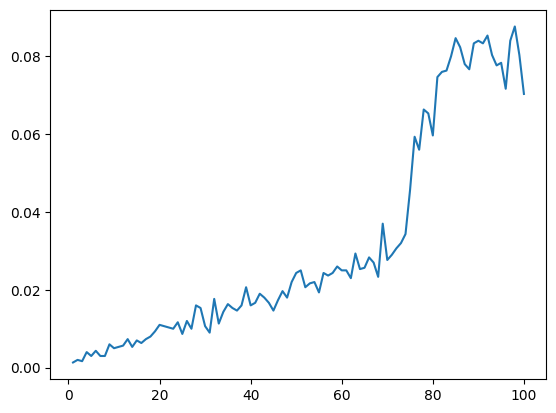

In [77]:
times = [(9.5 * i/7500) for i in range(7500)]
print(np.sum(times)/(3600))
simulations = np.load("simulation_data.npy")
plt.plot(range(1,101), simulations)